In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xx, yy = np.meshgrid(range(8), range(8))

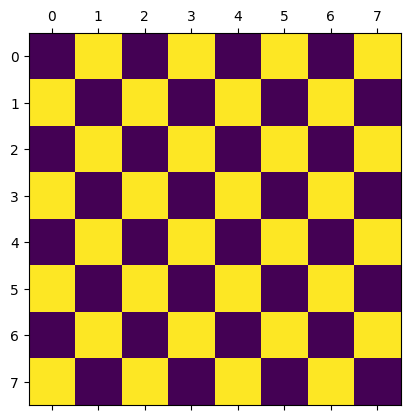

In [3]:
plt.matshow((xx + yy) % 2);

In [4]:
xx[:4, :4]

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [5]:
yy[:4, :4]

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

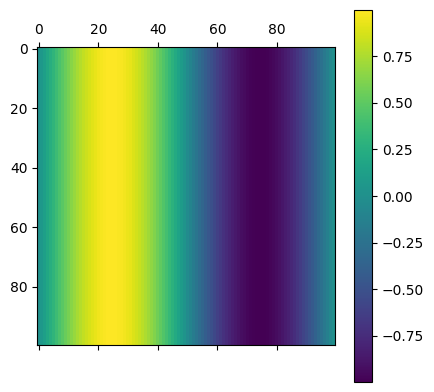

In [6]:
xx, yy = np.meshgrid(np.linspace(0, 2*np.pi, 100), np.linspace(0, 2*np.pi, 100))

plt.matshow(np.sin(xx))
plt.colorbar();

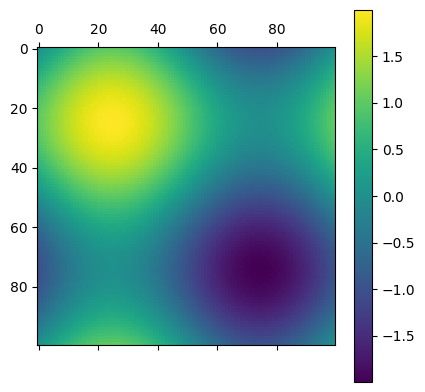

In [7]:
plt.matshow(np.sin(xx) +  np.sin(yy))
plt.colorbar();

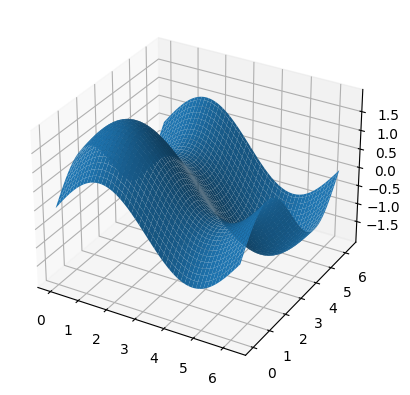

In [8]:
fig, ax = plt.subplots(1, subplot_kw={"projection": "3d"})
ax.plot_surface(xx, yy, np.sin(xx) + np.sin(yy));

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=5, n_features=2,
                   random_state=0)

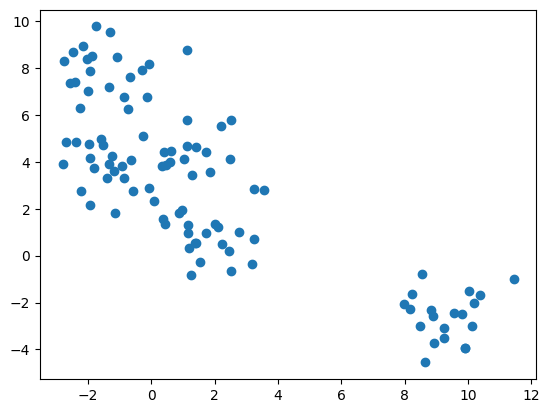

In [10]:
plt.scatter(X[:, 0], X[:, 1]);

In [11]:
from sklearn import cluster
kmeans = cluster.KMeans(5)
kmeans.fit(X)

/home/oren/projects/humans_thoughts/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [12]:
kmeans.predict([[-2, -4]])

array([2], dtype=int32)

In [13]:
kmeans.cluster_centers_

array([[ 1.5268918 ,  4.24714275],
       [ 9.32428263, -2.57506043],
       [ 1.70277081,  0.70764745],
       [-1.40434744,  7.90112106],
       [-1.37913869,  3.72788016]])

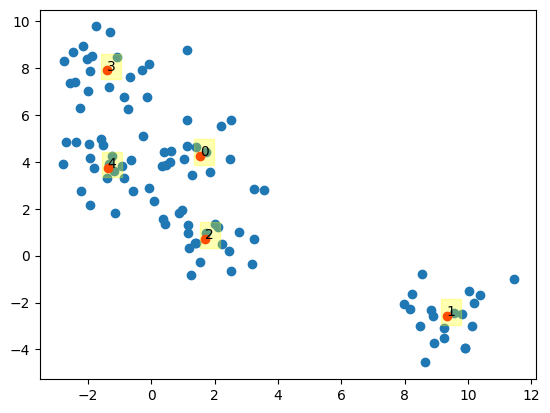

In [14]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red')
for i in range(len(kmeans.cluster_centers_)):
    plt.text(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], f"{i}", fontsize='medium', backgroundcolor=(1, 1, 0, 0.3))
plt.show()

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

/tmp/ipykernel_1549/3119790168.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


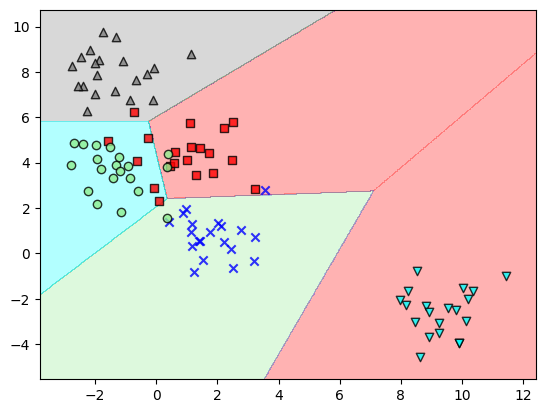

In [16]:
plot_decision_regions(X, y, kmeans)

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame(np.random.randn(8, 8))

In [19]:
xx, yy = np.meshgrid(range(8), range(8))
css_class = np.array(["black", "white"])[(xx + yy) % 2]

In [20]:
df.style.set_td_classes(pd.DataFrame(css_class))

,0,1,2,3,4,5,6,7
0,-0.506125,1.785677,-0.162718,-0.052530,-0.192971,-0.181823,-0.016793,0.768912
1,0.741298,1.107392,0.578130,0.484508,0.069505,-0.202061,1.417412,0.731899
2,-1.118066,0.154222,-1.171508,0.564945,0.117371,0.502774,-0.528024,-0.223139
3,-0.199282,-1.167232,-1.108291,-0.675440,-0.002878,0.752262,-0.013783,-0.568384
4,-0.925067,-0.333996,0.497288,0.611891,0.902900,-0.105184,0.012187,0.249732
5,-1.104976,-0.480965,2.024041,-0.026490,-1.100066,0.195658,-0.301769,-0.184557
6,-0.253906,1.720110,0.457201,0.926110,-0.863696,-0.017188,-0.995828,1.579853
7,-0.594978,-0.467185,0.191863,0.050168,0.068883,0.529248,-1.437493,-0.919301


In [21]:
%%html

<style>
    .black {
        background-color: lightgreen;
    }
    .white {
        background-color: pink;
    }
</style>